# **실습 3차시**

제출 기한: 2020년 10월 14일 수요일 15시 29분

실습 3차시 내용

* Linear Regression

* Logistic Regression

# **활동 1: Simple Linear Regression**

* machine learning의 목적은 real-world data를 잘 설명해줄 수 있는 모델을 설계하는 것입니다. 이를 통해 우리는 미래에 다른 input이 들어 왔을 때 무슨 일이 일어날지 예측할 수 있게됩니다.

* 가장 간단하고 직관적인 방법은 data의 경향에 맞게 선을 그어주는 것입니다. 이때 data에 대해 가장 잘 맞는 선을 찾아가는 과정을 "Linear Regression"이라고 합니다.

### [Example: Sandra’s lemonade stand’s revenue over its first 12 months of being open]

주어진 data(months, revenue)에 대해 x축은 months y축은 revenue로 하여 그래프를 그린 후 둘의 관계를 확인해 봅시다.

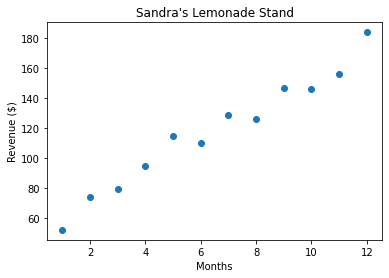

In [ ]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")
plt.title("Sandra's Lemonade Stand")
plt.xlabel("Months")
plt.ylabel("Revenue ($)")
plt.show()

### [Points and Lines]
* line은 아래의 수식처럼 slope(=m)와 intercept(=b)에 의해 결정됩니다. 

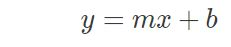
* Linear Regression에서의 목표는 우리가 가지고 있는 data에서 "가장 좋은"(="최적의") m과 b를 찾는 것입니다.       
* 위의 data에 대해 최적의 m과 b를 미리 구해 놓았다고 가정하겠습니다. 이때 최적의 m과 b 는 각각 10과 53입니다.

In [ ]:
# TODO: slope
m = 10
# TODO: intercept
b = 53

### [Practice 1]

위에서 주어진 최적의 m과 b를 이용하여 months에 대한 예측값 y를 생성하고 이를 실제 관측값인 revenue와 그래프를 그려 비교해봅시다. (앞에서와 마찬가지로 그래프를 그릴 때 x축은 months로 설정하십시오.)

In [ ]:
# TODO: m과 b를 이용하여 months에 대한 예측값 y 생성하기
y = [m*x + b for x in months]

# for문을 한 줄로 나타낸 것인데 months리스트에 있는 모든 x에 대해 (for x in months)
# m*x + b 를 계산한 후 리스트로 변환하는 코드

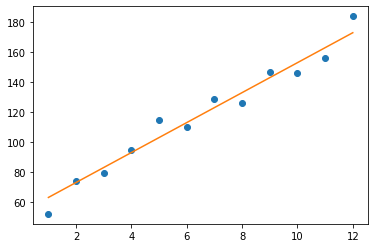

In [ ]:
# y와 revenue를 그래프를 그려 비교하기
plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()

### [Loss]
* 최적의 parameter(m과 b)를 찾기 위해서는 Loss를 정의해야합니다. 이때 Loss는 fitting된 line이 실제값과 얼마나 차이가 있는지를 수치로 표현한 것을 의미합니다. 즉, Loss가 낮을 수록 최적의 parameter에 가까운 것이고 Loss가 높을 수록 최적의 parameter와는 거리가 있는 것입니다.

* 여기서는 아래 그림처럼 해당 point에서 line까지의 squared distance를 Loss라고 정의합니다.

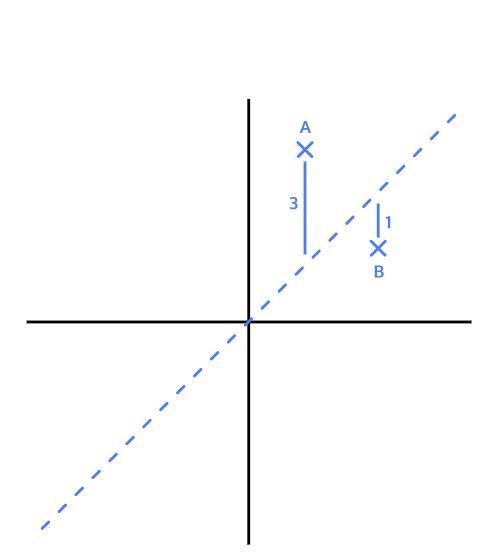

A의 squared distance는 9이고 B의 squared distance는 1입니다. 그래서 total Loss는 10이 됩니다. 만약 10보다 작은 Loss를 갖는 line을 찾는다면 그 line은 이 data에 대해 더욱 최적인 parameter라고 할 수 있습니다. 
* 결론적으로, 이러한 Loss를 기준으로 최적의 parameter인지 아닌지를 판단합니다. 즉, 주어진 전체 data에 대해 Loss를 최소로 하는 parameter(m, b)를 찾는 것이 목표입니다.
이를 식으로 표현하면 아래와 같습니다.

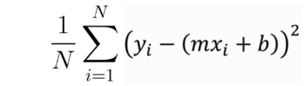

### [Example]

3개의 point (1, 5), (2, 1), (3, 3)가 주어졌을 때, y = x와 y = 0.5x +1인 두가지 line이 있다고 가정해보겠습니다.

In [ ]:
x = [1, 2, 3]
y = [5, 1, 3]

In [ ]:
# TODO: y = x
m1 = 1
b1 = 0

In [ ]:
# TODO: y = 0.5x + 1
m2 = 0.5
b2 = 1

In [ ]:
# TODO:
y_predicted1 = [m1*x_val + b1 for x_val in x]
y_predicted2 = [m2*x_val + b2 for x_val in x]

### [ Practice 2 ]

이 두가지 line 중 위의 식을 토대로 Loss를 계산하고, 그 중 Loss가 더 작은 line을 골라봅시다.

In [ ]:
# TODO: 
total_loss1 = 0
total_loss2 = 0

N = len(x)
for i in range(N):      # x에 모든 데이터에 대해
  total_loss1 += ((y[i] - y_predicted1[i])**2)/N
  total_loss2 += ((y[i] - y_predicted2[i])**2)/N

print(total_loss1, total_loss2)

5.666666666666666 4.499999999999999


### **Gradient Descent for Intercept**
* 최소의 loss를 찾는 것은 마치 아래의 그림처럼 언덕을 내려가다가 바닥에 도착하면 멈추는 것과 비슷합니다. 즉, parameter(m과 b)를 loss가 작아지는 방향으로 조정하다가 최소가되면 멈추게됩니다. 이때 loss가 작아지는 방향은 현재의 경사(=gradient)의 반대 방향을 의미합니다. (실제 Loss도 아래의 그림과 같은 형태입니다.)
* 이러한 과정을 "Gradient Descent"라고 합니다.

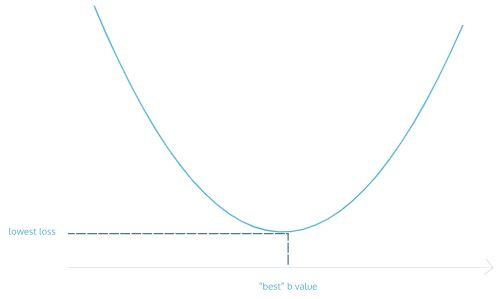

* 먼저 intercept(=b)에 대해서 gradient descent를 수행해보겠습니다. 우리는 앞에서 정의한 loss를 b에 대해 미분하여 gradient를 구할 수 있습니다. 결과는 아래와 같습니다.

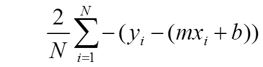

In [ ]:
# TODO: gradient descent을 함수로 구현해봅니다.

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += y_val - ((m*x_val) + b)
  b_gradient = - (2/N) * diff
  return b_gradient

# b와 m이 linear regression 모델의 parameter이고 수정되어야 하는 값이기 때문에
# b와 m에 대한 미분식을 구해야함

### **Gradient Descent for Slope**
* 마찬가지 방식으로 slope(=m)에 대한 gradient descent를 수행해보겠습니다.
이번에는 앞에서 정의한 loss를 m에 대해 미분하여 gradient를 구하면 됩니다.
결과는 아래와 같습니다.

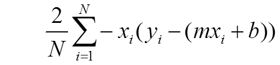

##### **[ Practice 3 ]**

intercept와 마찬가지 방식으로 slop에 대한 gradient식을 직접 함수로 구현해봅시다.

In [ ]:
# TODO: 이때 사용하는 변수명은 위와 동일하게 하되, 함수명은 get_gradient_at_m()로 하십시오.
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += x_val * (y_val - ((m*x_val) + b))
  m_gradient = - (2/N) * diff
  return m_gradient

### **Put it Together**
* b에 대한 gradient와 m에 대한 gradient를 계산하는 방법을 알았으므로 b와 m의 gradient를 이용하여 loss가 감소하는 방향으로 b와 m을 update합니다. 그리고 loss가 최소가 되면 update가 멈추게 되는데, 그때의 b와 m이 최적의 parameter가 됩니다.
* 이때 언덕을 내려가는 보폭을 조절할 수 있는데 이때 사용되는 것이 "learning rate"입니다. 즉, learning rate가 크면 큰 보폭으로 언덕을 내려가고 learning rate가 작으면 작은 보폭으로 언덕을 내려갑니다. 
* 즉, "learning rate"를 gradient에 곱해주어 보폭을 사용자가 정할 수 있게합니다.
* 그러나 learning rate는 신중하게 정할 필요가 있습니다.
  1. learning rate가 너무 작으면 loss의 최솟값에 수렴하는데 시간이 오래 걸립니다.
  2. learning rate가 너무 크면 최적의 parameter를 얻지 못할 수 있습니다.

In [ ]:
# TODO: step_gradient 함수
def step_gradient(b_current, m_current, x, y, learning_rate):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (b_gradient * learning_rate)
  m = m_current - (m_gradient * learning_rate)
  return [b, m]

### **Example: Sandra’s lemonade stand’s revenue over its first 12 months of being open**
* 이 함수들을 통해 앞에서 생성했던 data에 대해 한 step 후의 update된 parameter를 구해보겠습니다.

In [ ]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0
# TODO: learning rate
learning_rate = 0.01

# TODO: perform step_gradient
b, m = step_gradient(b, m, months, revenue, learning_rate)
print(b, m)

2.355 17.78333333333333


지금까지 gradient를 계산하는 법과 learning_rate를 설정하는 이유도 알았으므로 최적의 parameter를 찾을 때까지 위의 과정을 반복해보겠습니다. (여기서는 앞의 과정을 1000번만 반복해보겠습니다.=> `num_iterations=1000`)

In [ ]:
import matplotlib.pyplot as plt
  
# TODO: gradient_descent 함수
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range (num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return b, m

In [ ]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

In [ ]:
# TODO: gradient_descent 호출
b, m = gradient_descent(months, revenue, 0.01, 1000)
print(b, m)

49.60215351339813 10.463427732364998


위에서 찾은 최적의 parameter로 그래프를 그려보겠습니다.

In [ ]:
# TODO: 최적의 parameter로 linear regression line 만들기
y = [m*x + b for x in months]

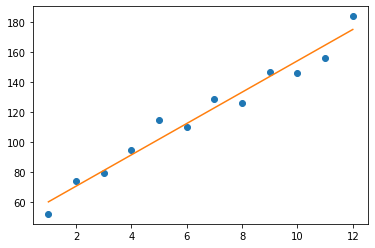

In [ ]:
plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

### [Scikit-Learn]
* 지금까지 linear regression algorithm을 직접 구현했습니다. scikit-learn library를 이용하여 보다 간단하게 linear regression을 사용할 수 있습니다. [다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* scikit-learn에 있는 linear_model 모듈을 통해 linear regression을 실습해보겠습니다.(단, 위에서 언급했던 `learning_rate`와 `num_iterations`은 scikit-learn의 기본값을 사용합니다.)
* 아래의 temperature/sales 데이터를 scikit-learn을 이용하여 fitting 해보겠습니다.


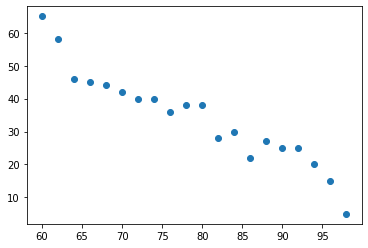

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

In [ ]:
# TODO:
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)

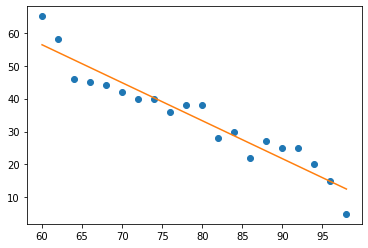

In [ ]:
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict)
plt.show()

### [Coefficients]

fitting된 모델에서 계수(coefficients)를 출력해보겠습니다.

In [ ]:
# TODO:
line_fitter.coef_

array([-1.15225564])

In [ ]:
# TODO:
line_fitter.intercept_

125.47819548872182

### [Evaluating the Model's Performance]

R-Squared (Coefficient of Determination)은 0과 1사이의 값으로 선형 회귀 모델이 데이터에 얼마나 fit 되었는지 나타냅니다. R-Squared가 1에 가까울 수록 모델은 종속 변수를 잘 예측할 수 있습니다.

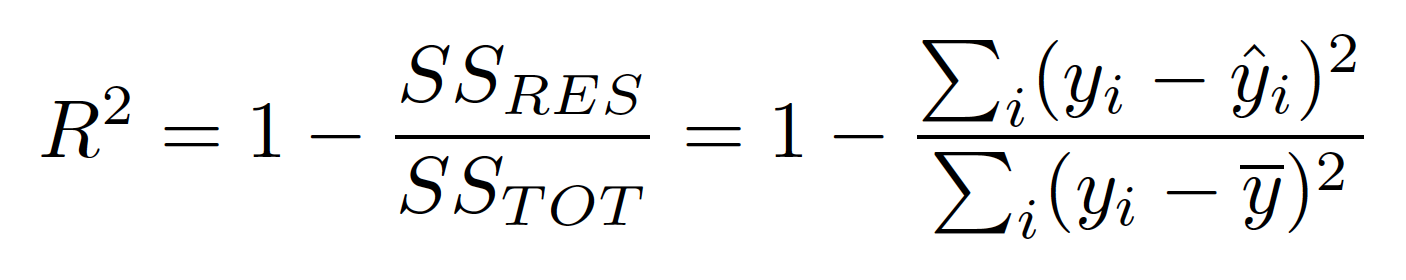

In [ ]:
# TODO:
line_fitter.score(temperature, sales)
# 전체의 제곱합 중에서 회귀 제곱합이 설명하는 비중
# y_는 데이터들의 평균. slob이 없는 intercept만 있는 라인
# 학습된 linear regression model의 오차
# 크다고 좋지도, 작다고 나쁘지도 않다.

0.9114088011031334

# **활동 2: Logistic Regression**

Logistic Regression은 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측하는 회귀 알고리즘 중 하나입니다. 그런 다음, 확률에 기반하여 특정 데이터가 어떤 카테고리에 속할지를 결정하게 되고, 궁극적으로 classification문제를 풀게 됩니다.

Logistic Regression을 활용하면 수신한 이메일이 스팸일지 아닐지를 예측할 수 있습니다. 만약 특정 이메일의 예측된 확률값이 0.5보다 크다면 해당 이메일을 정상메일으로 분류합니다. 여기서 정상메일은 positive class라고 불리고, label을 1로 설정합니다. positive class란 모델이 detect하고자 하는 class를 말합니다. 만약 특정 이메일의 예측된 확률값이 0.5보다 작다면, 해당 이메일을 스팸메일으로 분류합니다. 여기서 스팸메일은 negative class라고 불리고, label을 0으로 설정합니다. 이렇게 두 가지 class중 데이터가 어떤 class에 속할지 결정하는 일을 binary classification이라고 합니다.

### [Linear Regression Approach]

만약 대학교 강의에서 학생들이 기말 시험을 pass할 수 있을지를 예측한다고 생각해봅시다. 첫 번째로 해야할 일은 각 학생들이 시험을 pass할 확률을 예측하는 것입니다. 여기서 Linear Regression을 활용하면 어떨까요? 한번 해봅시다.

우선 기말 시험 data를 확인 해보겠습니다.




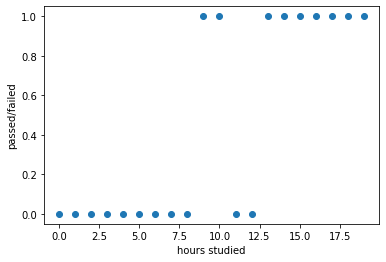

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

passed_exam = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])
passed_exam = passed_exam.reshape(-1, 1) 
hours_studied = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
hours_studied = hours_studied.reshape(-1, 1) 

# Scatter plot of exam passage vs number of hours studied
plt.scatter(hours_studied, passed_exam)
plt.ylabel('passed/failed')
plt.xlabel('hours studied')
plt.show()

각 학생들이 공부한 시간을 num_hours_studied이라 하고 해당 학생이 중간 시험을 통과한 여부를 y  (y 는 통과한 경우 1, 그렇지 않은 경우 0) 라고 한다면 Linear Regression을 통해 다음과 같이 직선을 그릴 수 있습니다.

In [ ]:
# TODO:
model = LinearRegression()
model.fit(hours_studied, passed_exam)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# TODO: Plug sample data into fitted model
sample_x = np.linspace(0, 20, 100).reshape(-1, 1)
# 0부터 20까지 100개의 데이터를 만드는 것.
# reshape은 2D 디멘션으로 만들어 주는 것.
probability = model.predict(sample_x).ravel()
# ravel은 디멘션을 하나 줄여 줌

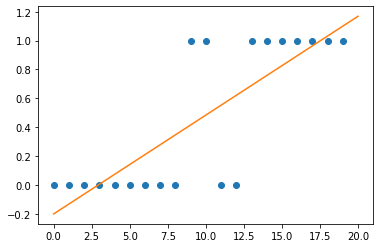

In [ ]:
plt.plot(hours_studied, passed_exam, 'o')
plt.plot(sample_x, probability)
plt.show()

여기에는 한 가지 문제가 존재합니다. 바로 낮은 num_hours_studied값을 보유한 학생에 대해서는 확률이 음의 값으로 예측된다는 것입니다. 마찬가지로 높은 값을 보유한 학생의 예측값은 1을 초과하게 됩니다. 이렇게 기준을 벗어나는 확률 값은 의미가 없습니다. 이러한 문제가 발생하는 이유는 바로 Linear Regression의 출력 범위가 - ∞ 부터 + ∞ 까지이기 떄문입니다.

Logistic Regression의 출력은 0과 1사이이므로 위와 같은 Linear Regression의 한계를 극복할 수 있습니다. Logistic Regression은 다음과 같은 과정으로 수행됩니다.

1. 모든 coefficients와 intercept를 0으로 초기화합니다.
2. 각각의 feature를 이에 상응하는 coefficient와 곱한 값과 intercept를 모두 더해 log-odds를 계산합니다.
3. 계산한 log-odds 값을 sigmoid 함수에 전달하여 0 과 1 사이의 확률값을 구합니다.
4. 계산한 확률값과 실제 label을 비교하여 Loss를 계산하고, gradient descent로 최적의 coefficients와 intercept를 찾습니다.
5. 최적의 파라미터를 찾았다면 classification threshold 값을 조절하여 positive class와 negative class를 어떻게 나눌지를 설정합니다.

위 방법대로 Logistic Regression을 구현해봅시다.


## [ Log-Odds ]
Linear Regression에서는 각 feature를 이에 상응하는 coefficient에 곱한 값과 intercept를 더해 predict를 하였습니다. Logistic Regression에서도 마찬가지지만 log-odds를 계산합니다.

log-odds는 특정 데이터가 positive class에 속할 확률을 표현하는 또 다른 방법입니다. 확률론에서 특정 사건의 odds(승산)을 계산하는 공식은 다음과 같습니다.

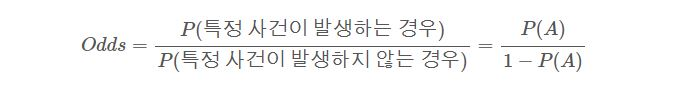

Odds는 특정 사건이 일어나는 횟수가 특정 사건이 일어나지 않는 횟수보다 얼마나 더 많은지를 의미합니다. 만약 특정 학생이 시험에서 pass할 확률이 0.7이라면, pass하지 못 할 확률은 1 - 0.7 = 0.3 이고, 이 경우 odds를 다음과 같이 계산할 수 있습니다.

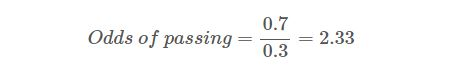

Odds는 0과 양의 무한대의 값을 범위로 갖습니다. log-odds는 odds에 log를 취한 것으로 음의 무한대부터 양의 무한대까지의 범위를 갖습니다.

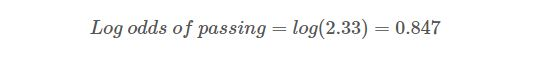

Logistic Regression 모델에서, 우리는 아래와 같이 z 값으로 나타내지는 log-odds 값을 계산할 수 있습니다.

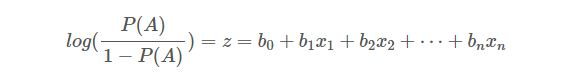


이로써 특정 데이터의 feature values를 해당 데이터가 positive class에 속할 가능성으로 매핑할 수 있습니다. 이 때 이러한 곱의 합을 dot product(내적) 이라고 합니다. 내적은 numpy의 np.dot() 메서드를 활용하여 쉽게 계산할 수 있습니다.

기말 시험 data에서 최적의 coefficient와 intercept가 각각 0.03, -0.3이라고 가정했을 때의 log-odds를 계산 해봅시다.

In [ ]:
calculated_coefficients = 0.03
intercept = -0.3

In [ ]:
# TODO: log_odds() 함수 정의
def log_odds(features, coefficients, intercept):
  return np.dot(features, coefficients) + intercept

In [ ]:
# TODO: hours_studied 데이터에 대해서 log-odds를 계산해봅니다.
calculated_log_odds = log_odds(hours_studied, calculated_coefficients, intercept)
print(calculated_log_odds)

[[-0.3 ]
 [-0.27]
 [-0.24]
 [-0.21]
 [-0.18]
 [-0.15]
 [-0.12]
 [-0.09]
 [-0.06]
 [-0.03]
 [ 0.  ]
 [ 0.03]
 [ 0.06]
 [ 0.09]
 [ 0.12]
 [ 0.15]
 [ 0.18]
 [ 0.21]
 [ 0.24]
 [ 0.27]]


## [ Sigmoid Function ]

Sigmoid Function은 log-odds인 z 값을 취해서 아래와 같이 0 과 1 사이의 값을 반환합니다.

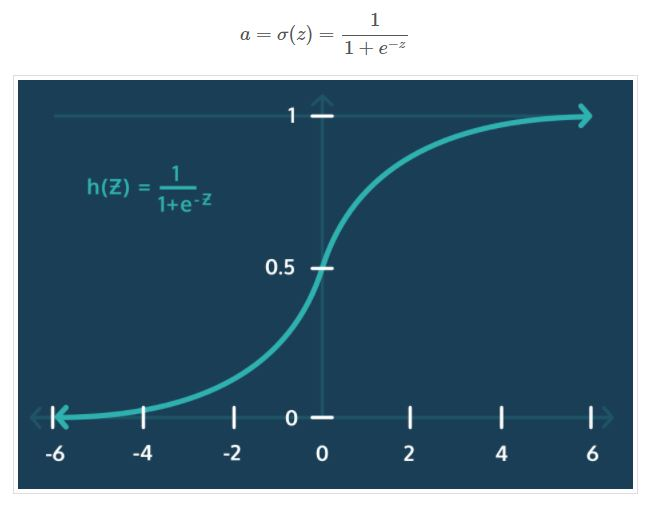


이는 궁극적으로 Logistic Regression이 특정 데이터가 positive class에 속할 확률을 계산하게 합니다. 이를 python 코드로 구현해보겠습니다. 

In [ ]:
# TODO: sigmoid 함수 정의하기
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
# TODO: 확률 계산해보기
probabilities = sigmoid(calculated_log_odds)
print(probabilities)

[[0.42555748]
 [0.4329071 ]
 [0.44028635]
 [0.44769209]
 [0.45512111]
 [0.46257015]
 [0.47003595]
 [0.47751518]
 [0.4850045 ]
 [0.49250056]
 [0.5       ]
 [0.50749944]
 [0.5149955 ]
 [0.52248482]
 [0.52996405]
 [0.53742985]
 [0.54487889]
 [0.55230791]
 [0.55971365]
 [0.5670929 ]]


0 과 1 사이의 값을 반환함을 확인했습니다.

## [ Log-Loss ]

지금까지 Logistic Regression 모델이 어떻게 확률을 예측하는지 알아보았습니다. 그렇다면 이제 남은 것은 최적의 coefficients와 intercept를 구하는 일입니다. 그런데 어떻게 이를 구할 수 있을까요? 이에 대답하기 위해선 주어진 모델이 데이터에 얼마나 fit한지를 측정하는 기준이 필요합니다. 이를 loss function 혹은 cost function이라고 합니다.

모델이 데이터에 ‘fit’ 하단걸 측정하기 위해선 먼저 각 데이터에 대한 loss를 계산한뒤 loss의 평균을 내야합니다. Logistic Regression에서의 loss function은 Log Loss라고 불리며, 공식은 다음과 같습니다.

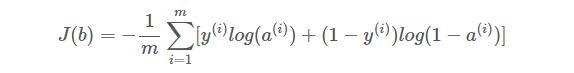



* m 은 전체 데이터의 개수입니다.
* $y^{(i)}$는 $i$ 번째 데이터의 class 입니다.
* $a^{(i)}$는 $i$ 번째 데이터의 log-odds 값에 sigmoid 를 취한 값입니다. 즉 $i$ 번째 데이터가 positive class에 속할 확률을 나타낸 값입니다.

왜 위와 같은 공식이 유도되는 걸까요? 만약 i 번째 데이터의 class가 y=1 이라면 해당 데이터에 대한 loss는 다음과 같습니다.

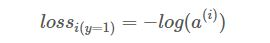


loss를 최소화 시키려면 $a^{(i)}$ 값이 커야 합니다. 즉, 예측된 확률 값이 원래 class인 1 에 가까울수록 loss는 줄어들게 됩니다.

이번에는 반대로 $i$ 번째 데이터의 class가 y=0 인 경우를 생각해봅시다.

 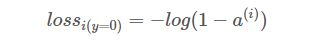

loss를 최소화 시키려면 $a^{(i)}$값이 작아야 합니다. 즉, 예측된 확률 값이 원래 class이 0에 가까울수록 loss는 줄어들게 됩니다. 

 아래의 그래프는 class가 y=1, y=0 일 때 a값에 따라 loss가 어떻게 변화하는지를 나타냅니다.

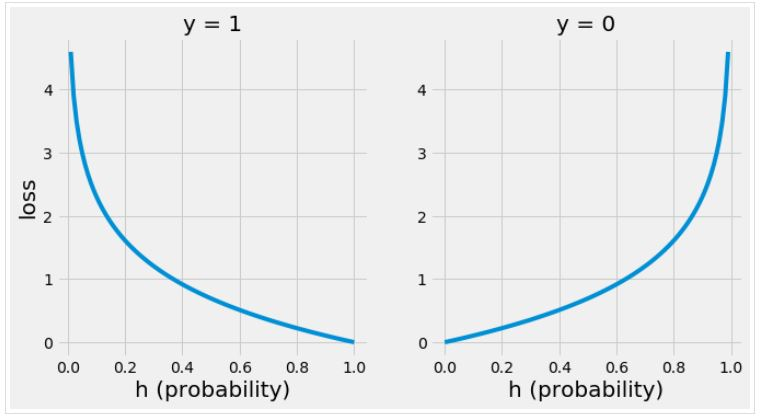 

그래프를 보면 올바르게 예측할수록 loss가 줄어드는 것을 볼 수 있습니다. 반대로 잘 못 예측하게 되면 loss가 크게 증가하는데, 이는 모델이 잘못 예측할 때 패널티를 강하게 줌으로써 올바른 예측을 할 수 있도록 유도할 수 있습니다.

이제는 Linear Regression과 마찬가지로 gradient descent를 활용해서 loss를 최소화시키는 coefficients와 intercept를 찾으면 됩니다. 여기서는 따로 다루지 않겠습니다.

이를 python 코드로 구현해보겠습니다. 그런 후 현재의 coefficients와 intercept의 log-loss를 구해봅시다.

In [ ]:
# TODO: log_loss 함수 구현해보기
# probabilities는 log-odds에 sigmoid를 취한 확률값이며, actual_class는 실제 class label입니다.
def log_loss(probabilities, actual_class):
  return (np.sum(-(1/actual_class.shape[0]) * (actual_class * np.log(probabilities) + (1-actual_class) * np.log(1-probabilities))))
  # shape은 dimesion을 출력하는데 shape[0]은 디멘션의 첫 번째 길이, 즉 인스탄스의 갯수

In [ ]:
# TODO: 구한 probabilities와  passed_exam의 log_loss 구하기
loss = log_loss(probabilities, passed_exam)
print(loss)

0.6279073897953891


## [ Classification Thresholding ]

Logistic Regression은 예측된 확률 값이 임계값을 넘느냐 못 넘느냐에 따라서 class를 분류합니다. 이 임계값을 classification threshold 라고 합니다.

Classification threshold의 디폴트 값은 0.5 입니다. 만약 특정 데이터의 예측된 확률 값이 0.5 보다 크거나 같다면 해당 데이터는 positive class로 분류됩니다. 반대로 예측된 확률 값이 0.5 보다 낮다면 negative class로 분류됩니다.

만약 더욱 엄격하게하고자 한다면 threshold를 0.6이나 0.7로 조정할 수 있습니다. 즉, 모델이 positive class를 더 적게 예측할 수 있도록 하는 것입니다. 

이에 대해 예측된 확률값이 임계값을 넘으면 1, 그렇지 않으면 0 을 반환하는 함수를 구현해보겠습니다.

In [ ]:
# TODO: predict_class함수 구현하기
def predict_class(features, coefficients, intercept, threshold):
  z = log_odds(features, coefficients, intercept)
  a = sigmoid(z)
  return np.where(a >= threshold, 1, 0)

# a가 threshold 이상이면 1을 그렇지 않으면 0을 return

In [ ]:
# TODO: threshold=0.5로 최종 예측 해보기
final_result = predict_class(hours_studied, calculated_coefficients, intercept, 0.5)
print(final_result)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


이번에는 더욱 엄격하게 threshold를 0.55로 설정하여 위의 결과와 비교해봅시다.  

In [ ]:
# TODO: threshold=0.55로 최종 예측 해보기
final_result2 = predict_class(hours_studied, calculated_coefficients, intercept, 0.55)
print(final_result2)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


1로 예측한 개수가 확실히 줄어들었습니다.

## [ Scikit-Learn ]

지금까지 Logistic Regression이 어떤 과정으로 이뤄지는지 알아보았습니다. 이제 sklearn에서 제공하는 메서드를 활용하여 Logistic Regression을 구현해봅시다.

* 먼저 sklearn의 linear_model 모듈에서 LogisticRegression을 임포트한 뒤, LogisticRegression 객체를 생성해 줍니다. 
* 그런 다음, .fit() 함수에 features와 labels을 파라미터로 전달하여 모델을 학습시킵니다. .fit() 함수는 내부적으로 gradient descent를 수행해서 최적의 coefficients와 intercept를 찾아줍니다.
* 마지막으로 .predict() 함수로 테스트할 데이터를 전달하여 1과 0으로 예측된 결과를 확인할 수 있습니다. 이때 sklearn은 디폴트로 classification threshold를 0.5로 설정합니다.
* 만약 데이터의 class가 아닌 예측된 확률을 얻고자 한다면 .predict_proba() 함수에 동일한 파라미터를 전달하면 됩니다. 이 함수는 0 과 1사이의 예측된 확률값을 반환합니다.

기말 시험 data에 대해 LogisticRegression을 수행하여 앞에서 확인했던 Linear Regression의 결과를 plot을 그려 비교 해봅시다.

In [ ]:
from sklearn.linear_model import LogisticRegression

# TODO: logistic regression model 생성하기
model = LogisticRegression()
model.fit(hours_studied, passed_exam)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# TODO: Plug sample data into fitted model
sample_x = np.linspace(0, 20, 100).reshape(-1, 1)
probability = model.predict_proba(sample_x)[:, 1]

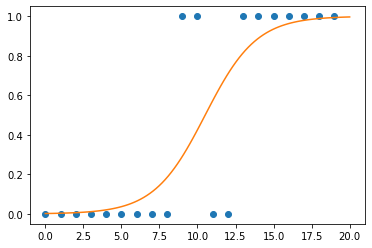

In [ ]:
plt.plot(hours_studied, passed_exam, 'o')
plt.plot(sample_x, probability)
plt.show()

낮은 num_hours_studied 값을 보유한 학생에 대해서는 확률이 음의 값으로 예측된다는 것과 높은 값을 보유한 학생의 예측값은 1을 초과한다는 Linear Regression의 문제점을 Logistic Regression이 해결했음을 확인 할 수 있습니다.

그렇다면 최적의 coefficients와 intercept는 무엇일까요? 이를 확인하려면 아래와 같이 하면됩니다.

In [ ]:
# TODO: 최적의 coefficient와 intercept 프린트하기
model.coef_   # model의 slob

array([[0.59365161]])

In [ ]:
model.intercept_

array([-6.23665281])

# **과제**

1. 이전 실습2 과제의 코드를 이용하여 titanic.csv 데이터의 url를 통해 `pandas` `DataFrame`으로 데이터를 가져옵니다.
2. 이전 실습2 과제처럼 동일하게 1) 전체 데이터에서 `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked` feature을 고르고, 2) `Age` feature의 NA값을 drop하고, 3) `Sex` feature을 `scikit-learn`의 `LabelEncoder`을 사용하여 정수형으로 변환합니다.
3. `.head()`를 사용하여 데이터의 첫 다섯개 instance를 프린트해봅니다.
4. 주어진 `onehot()` 함수를 사용하여 `Embarked` feature을 one-hot encoding 합니다.
```python
def onehot(data, feature):
  '''
  data의 feature column을 one hot으로 변환해줍니다.
  data: pandas DataFrame
  feature: string, 데이터 프레임의 column 이름
  '''
  return pd.concat([data, pd.get_dummies(data[feature], prefix=feature)], axis=1).drop([feature], axis=1)
```
5. `.head()`를 사용하여 one-hot encoding이 올바르게 되었는지 확인합니다.
6. 아래 주어진 코드를 이용하여 데이터를 feature 변수 `x`와 label 변수 `y`로 분리하고 `train_test_split()`함수를 이용하여 데이터를 train data과 test data으로 나눕니다. 만약 deterministic한 결과를 원한다면 `random_state` 파라미터를 지정해줍니다. (지정하지 않아도 과제 점수에는 상관이 없습니다.) [train_test_split() 다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
```python
# 데이터를 feature X와 label y로 나눕니다.
y = df[['Survived']].to_numpy().ravel()
x = df.drop(columns=['Survived'])
```

7. `LogisticRegression()` 모델을 생성합니다. 이때, 모델 파라미터는 `max_iter`을 `1000`으로 지정해줍니다. 이 모델을 train data에 fit 해봅니다.
8. test data에 대하여 score을 계산합니다. 
9. 훈련된 Logistic regression 모델의 `.coef_`를 프린트해보고, `.coef_`의 절대값이 큰 feature 2개와 절대값이 작은 feature 2개가 무엇인지, 그리고 각각에 대해 그 값이 몇인지 서술합니다.
10. https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic#Part-3.-Visualization-and-Feature-Relations
위 링크의 Part 3에서 제공하는 각 feature와 생존여부에 대한 시각화 통계자료를 활용하여, 
9번에서 `.coef_`의 절대값이 크게 나온 2개의 feature는 왜 `.coef_`가 크게 나왔는지, 반대로 절대값이 작게 나온 2개의 feature는 왜 `.coef_`가 작게 나왔는지에 대한 분석을 서술합니다.

과제 2 에는 embarked feature가 포함되어 있지 않으니 직접 포함 시켜야 함.age 값에는 na값 있는데 그거 드랍하기!
   
onehot거기에 dataframe과 embarked feature 넣으면 onehot으로 변환
   
train과 test 나누는거 비율은 0.3

In [ ]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/titanic.csv"

In [ ]:
def onehot(data, feature):
  '''
  data의 feature column을 one hot으로 변환해줍니다.
  data: pandas DataFrame
  feature: string, 데이터 프레임의 column 이름
  '''
  return pd.concat([data, pd.get_dummies(data[feature], prefix=feature)], axis=1).drop([feature], axis=1)


In [ ]:
# 과제 1
data = pd.read_csv(data_url)

In [ ]:
# 과제 2
from sklearn.preprocessing import LabelEncoder

data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data = data.dropna()
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

In [ ]:
# 과제 3
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# 과제 4
data = onehot(data, 'Embarked')

In [ ]:
# 과제 5
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
# 과제 6
y = data[['Survived']].to_numpy().ravel()
x = data.drop(columns=['Survived'])

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 1)

In [ ]:
# 과제 7
from sklearn.linear_model import LogisticRegression

# TODO: logistic regression model 생성하기
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 과제 8
print(model.score(x_test, y_test))

0.7757009345794392


In [ ]:
# 과제 9
print(model.coef_)

[[-1.08253723 -2.49962467 -0.0449937  -0.36963546 -0.07654996  0.00311951
   0.24343063 -0.35030201  0.09843222]]


### 과제 9
model.coef_를 출력하면 [[-1.08253723 -2.49962467 -0.0449937  -0.36963546 -0.07654996  0.00311951
   0.24343063 -0.35030201  0.09843222]]이 나온다.    
 
- 절댓값이 가장 큰 두 개는 -2.49962467와 -1.08253723로, 각각 Sex feature와 Pclass feature이다.   
- 절댓값이 가장 작은 두 개는 0.00311951와 -0.0449937으로, 각각 Age feature와 Fair feature이다.

### 과제 10
coefficient의 절댓값이 가장 큰 두 개의 feature가 왜 Sex feature와 Pclass feature인지 설명하고자 한다. 이 두개의 feature가 label 결정에 큰 영향을 끼치기 때문이다.   
   
- Gender와 Survived를 visualization한 결과를 보면, 여성이 남성보다 훨씬 더 많이 살아 남은 것을 할 수 있다. 또한 성별 마다 살아남은 비율을 보면, 남성은 대부분이 살아 남지 못했지만, 여성은 많이 살아남은 것을 알 수 있다. 즉, 성별마다 살아남은 비율이 다르기 때문에 이 feature는 label 예측에 영향을 크게 미치게 되고 따라서 coefficient의 절댓값이 크게 결정된 것이다.   
   
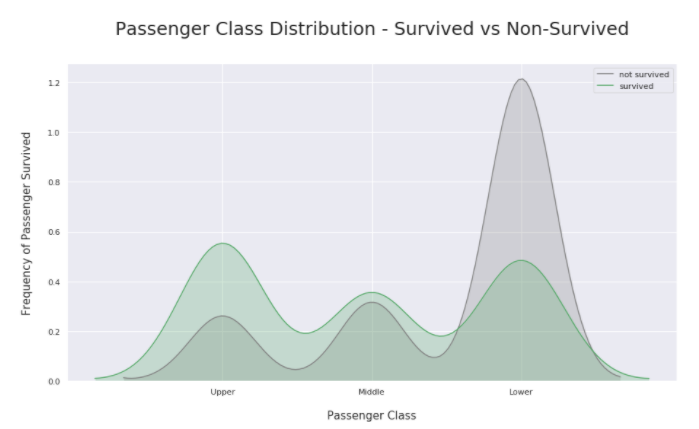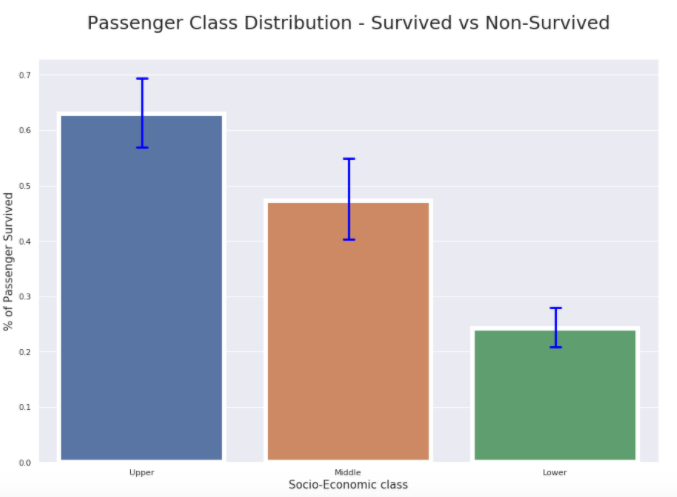
- Passenger Class에 따라서도 살아남은 비율이 다른 것을 볼 수 있다. Upper class의 약 63퍼센트가 살아남지만, Lower class에서는 약 24퍼센트만이 살아남았다. 즉, Upper class일 수록 survived 비율이 높다. 따라서 Pclass도 학습에 영향을 많이 끼치는 feature이고, 따라서 Pclass의 coefficient의 절댓값도 크다.      
   
      
       


          
             
지금까지는 coefficient의 절댓값이 가장 큰 두 개의 feature와 label의 관계를 알아보고, coefficient의 절댓값이 큰 이유에 대해 서술했다. 아래는 coefficient의 절댓값이 가장 작은 두 개에 대해 설명하려고 한다.   



   
      
      
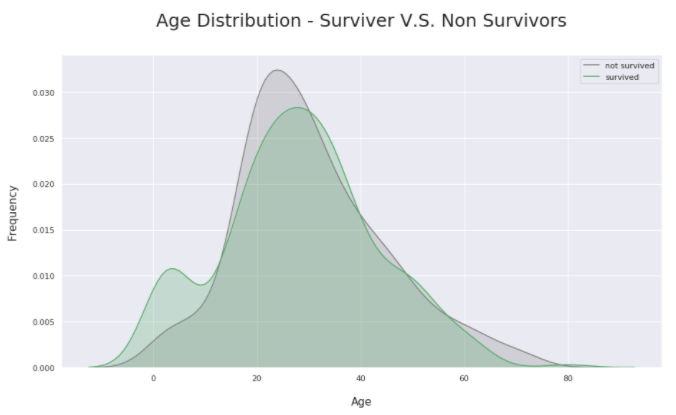
- Age에 따른 survive와 non survive 분포를 보면, 두 개가 큰 차이가 없는 것을 알 수 있다. 다만 나이가 어린 곳은 survived비율이 non survived비율 보다 크다(아마 어린 아이를 우선시 해서 그런 듯 하다.). 이 부분을 제외하고는 분포가 거의 비슷하다. 따라서 나이대에 따라 survived와 non-survived 차이가 크지 않아 이 역시 label 분류에 큰 영향을 끼치지 않아서 coefficient의 절댓값이 작게 결정되었다.   

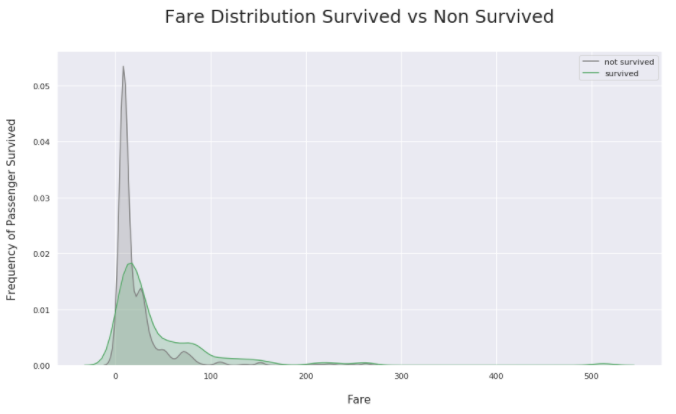
- Fare의 경우 survived 집단과 unsurvived 집단의 분포가 크게 다르지 않은 것을 알 수 있다. survived와 non-survived 모두 대부분 100달러 이하의 fare에 분포 한다. 유의미한 차이가 적기 때문에 label을 분류하는데 크게 영향을 끼치지 않아서 coefficient의 절댓값이 작다.